## Machine Learning Online Class

##  Exercise 7 | Principle Component Analysis and K-Means Clustering

Instructions

------------

  This file contains code that helps you get started on the
  exercise. You will need to complete the following functions:

     pca.m
     projectData.m
     recoverData.m
     computeCentroids.m
     findClosestCentroids.m
     kMeansInitCentroids.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

In [1]:
import sys
import numpy as np
from scipy.io import loadmat
from IPython.display import Image
import matplotlib.pyplot as plt
sys.path.append('../')
from ex7.kMeansInitCentroids import kMeansInitCentroids
from ex7.runkMeans import runkMeans
from ex7.computeCentroids import computeCentroids
from ex7.findClosestCentroids import findClosestCentroids

In [2]:
## ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you should complete the code in the findClosestCentroids function.

print('Finding closest centroids.')

# Load an example dataset that we will be using
data = loadmat('./ex7data2.mat')
X = data['X']

# Select an initial set of centroids
K = 3  # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: ')
print(idx[0:3].ravel())
print('(the closest centroids should be 1, 3, 2 respectively)')
print('由于python的下标从0开始，所以输出对应应为 0, 2, 1')

Finding closest centroids.
Closest centroids for the first 3 examples: 
[0 2 1]
(the closest centroids should be 1, 3, 2 respectively)
由于python的下标从0开始，所以输出对应应为 0, 2, 1


In [3]:
## ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.

print('\nComputing centroids means.\n')
print(X.shape)
#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: ')
print(np.around(centroids, decimals=6))
print('\n(the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]\n')


Computing centroids means.

(300, 2)
Centroids computed after initial finding of closest centroids: 
[[2.428301 3.157924]
 [5.813503 2.633656]
 [7.119387 3.616684]]

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



K-Means iteration 10/10...


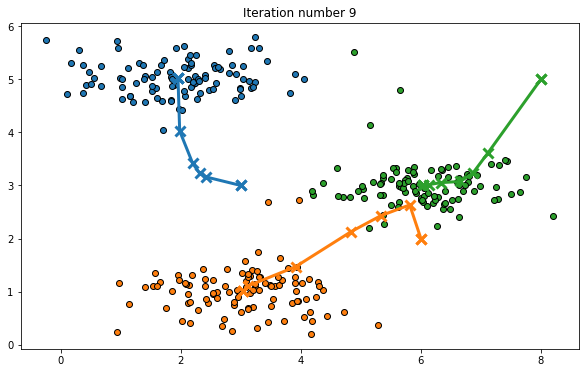


K-Means Done.



In [4]:
## =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided.

print('\nRunning K-Means clustering on example dataset.\n')

# Load an example dataset
data = loadmat('ex7data2.mat')

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('\nK-Means Done.\n')

In [5]:
## ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel onto its closest centroid.
#
#  You should now complete the code in kMeansInitCentroids.m

print('\nRunning K-Means clustering on pixels from an image.\n')
Image(filename='./bird_small.png')
#  Load an image of a bird
# A = double(imread('bird_small.png'))

# If imread does not work for you, you can try instead
# 显然我们python还是直接读取mat文件比较好
data = loadmat('bird_small.mat')
A = data['A']
A = A / 255  # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], 3))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly.
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)


Running K-Means clustering on pixels from an image.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...



Applying K-Means to compress an image.



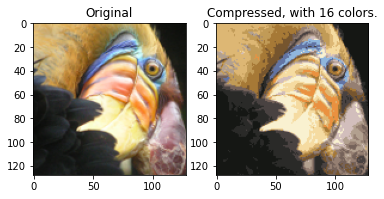

In [6]:
## ================= Part 5: Image Compression ======================
#  K-means做到这里都应该大概理解了，我们用一用现成的库，不使用MATLAB源码的方式
from sklearn.cluster import KMeans
from skimage import io

print('\nApplying K-Means to compress an image.\n')

# 数据初始化
K = 16  # 聚类中心个数
max_iters = 10  # 迭代次数
pic = io.imread('./bird_small.png') / 255
data = pic.reshape(128 * 128, 3)

# 使用K-means
model = KMeans(n_clusters=K, n_init=max_iters)  # 设计模型
model.fit(data)  # 训练数据

"""
下面你可以选择用自己训练出来的聚类中心
也可以选择使用现成的第三方库（推荐），因为人家是多组初始值
"""
centroids = model.cluster_centers_  # 获取聚类中心
C = model.predict(data)  # 根据源数据，将同一个类的点归属为同一种颜色（聚类中心）
compressed_pic = centroids[C].reshape((128, 128, 3))  # 展开为原来的图片尺寸
"""
以上为第三方库
========== 分割线 ===========
以下使用自己的聚类中心
"""
# compressed_pic = centroids[idx].reshape((128, 128, 3))
"""
end
"""

# 绘图
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[0].set_title('Original')
ax[1].imshow(compressed_pic)
ax[1].set_title('Compressed, with {} colors.'.format(K))
plt.show()